In [1]:
# Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Sentiment and Technical Analysis Tools
from textblob import TextBlob
import pandas_ta as talib
import datetime


In [2]:

# Paths
zip_path = 'C:/Users/dell/Downloads/yfinance_data.zip'
extract_to = 'C:/Users/dell/Downloads/yfinance_data'  # Folder to extract to

# Create directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Now read the CSV
csv_path = f'{extract_to}/yfinance_data/AAPL_historical_data.csv'
stock_df = pd.read_csv(csv_path)

print(stock_df.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:

# Paths
zip_path = 'C:/Users/dell/Downloads/raw_analyst_ratings.csv.zip'
extract_to = 'C:/Users/dell/Downloads/extracted_data'  # Folder to extract to

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Now read the CSV
csv_path = f'{extract_to}/raw_analyst_ratings.csv'  # Adjust if filename is different
ratings_df = pd.read_csv(csv_path)

print(ratings_df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

# 3. Basic EDA

In [4]:
# Stock Data Overview
print(stock_df.head())
print(stock_df.info())

# Ratings Dataset Overview
print(ratings_df.head())
print(ratings_df['publisher'].value_counts())
ratings_df['headline_length'] = ratings_df['headline'].apply(len)


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non

# 4. Sentiment Analysis (Task 3)

In [5]:
# Sentiment score.
ratings_df['sentiment'] = ratings_df['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Safely convert to datetime.
ratings_df['date'] = pd.to_datetime(ratings_df['date'], errors='coerce')

# Drop any rows where datetime conversion failed.
ratings_df = ratings_df.dropna(subset=['date'])

# Extract just the date.
ratings_df['date'] = ratings_df['date'].dt.date

# Daily average sentiment.
daily_sentiment = ratings_df.groupby('date')['sentiment'].mean().reset_index()


# 5. Time Series Technical Analysis (Task 2)

Columns in dataset: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
         only_date stock                                           headline
355064  2011-04-27   DGP  ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)
435456  2011-04-28   ESR                A New Regional Emerging Markets ETF
348178  2011-04-28   DEJ  Dejour Extends Credit Facility to October 31st...
48673   2011-04-29   AIA        ETF Showdown: Crouching Tigers, Hidden ETFs
536537  2011-04-29   GDL  The GDL Fund to Redeem Its Outstanding 8.50% S...


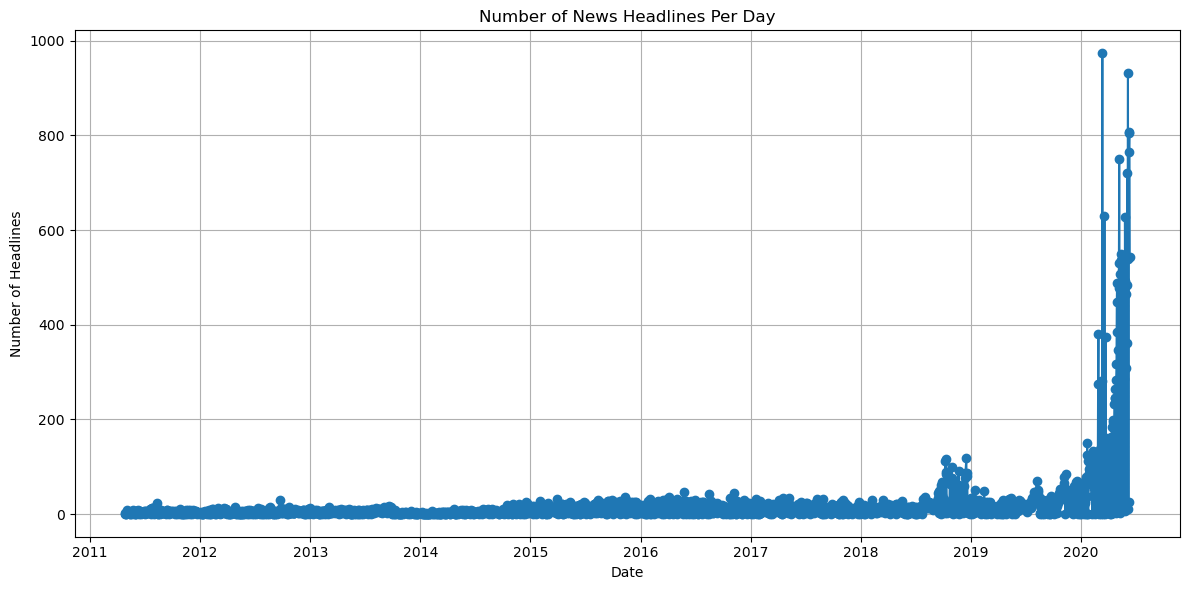

In [10]:
# Clean column names to avoid hidden spaces or typos
stock_df.columns = stock_df.columns.str.strip()

# Show column names for verification
print("Columns in dataset:", stock_df.columns.tolist())

# Convert 'date' column to datetime
stock_df['date'] = pd.to_datetime(stock_df['date'], errors='coerce')

# Drop rows with invalid or missing dates (optional but recommended)
stock_df = stock_df.dropna(subset=['date'])

# Sort by date for better chronological analysis
stock_df = stock_df.sort_values(by='date')

# Optional: Create a new column for just the date (no time part)
stock_df['only_date'] = stock_df['date'].dt.date

# Show preview of cleaned data
print(stock_df[['only_date', 'stock', 'headline']].head())

# Plot: Number of news articles per day
news_counts = stock_df.groupby('only_date').size()

plt.figure(figsize=(12, 6))
news_counts.plot(kind='line', marker='o')
plt.title('Number of News Headlines Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Headlines')
plt.grid(True)
plt.tight_layout()
plt.show()